In [1]:
import numpy as np
import matplotlib.pyplot as plt

## LCOE Calculation for Block Island Wind Farm
### 9/27/21 OCE513
Set up CRF calculation with range of interest rates and lifespans. 

In [2]:
i = np.linspace(.05, .10)
n = np.linspace(20, 30)
i_, n_ = np.meshgrid(i,n)
crf = (i_*(1+i_)**n_) / ((1+i_)**n_-1)

Visualize result

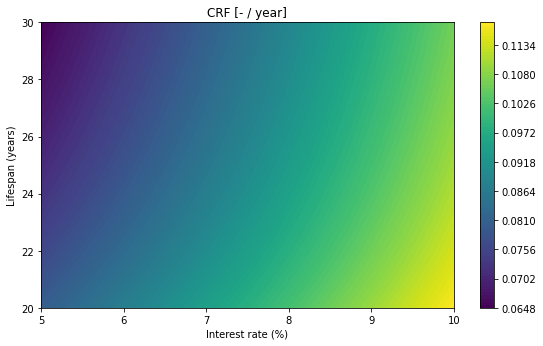

In [3]:
plt.contourf(i_*100, n_, crf, levels=100)
plt.xlabel("Interest rate (%)")
plt.ylabel("Lifespan (years)")
plt.colorbar()
plt.title("CRF [- / year]")
fig = plt.gcf()
fig.set_size_inches(9.25, 5.25)
plt.savefig("crf.png")
plt.show()

Calculate CRF for different corners of the field

In [4]:
print(crf[0][0]) #low/short
print(crf[0][-1]) #high/short
print(crf[-1][0]) #low/long
print(crf[-1][-1]) #high/long

0.08024258719069129
0.11745962477254576
0.06505143508027657
0.1060792482526339


Calculate LCOE using four extreme CRF values

In [5]:
ls = (crf[0][0]) #low/short
hs = (crf[0][-1]) #high/short
ll = (crf[-1][0]) #low/long
hl = (crf[-1][-1]) #high/long

crf_ = [ls, hs, ll, hl]

p = 268e6 / 30000 # [$ / kW]
f_o = 75e6*1.37/1e6 # [$ / kW - year]

for c in crf_:
    print((p*c+f_o)/(8760*.475))


0.19696798339425833
0.27686997868334745
0.1643537979773622
0.2524372228767595
